<a href="https://colab.research.google.com/github/huliyao1115/Hello-world/blob/main/Final%20Assignment-Polynominal%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [102]:
df = pd.read_csv('Wrong_SMILES_Delete.csv')

In [103]:
df.drop(['SMILE_Organic_linker_1','Molar_Volume_cm3_mol','Resistivity_Ω_cm','Mohs_Hardness','Specific_Heat_Capacity_J_(g·K)-1','Ionization_Potential_eV','Electrical_Conductivity_MS_m','Thermal_Conductivity_W_m·K','Rayon_Atomique_pm','Electron_Affinity_eV','Boiling_Point_℃','Melting_Point_℃','Atomic_Number','METAL','Atomic_Number','1s', '2s', '2p', '3s', '3p', '3d', '4s', '4p', '4d', '4f', '5s', '5p'], axis=1, errors='ignore', inplace=True)

In [104]:
df.columns


Index(['Surface_Area', 'Pore_Volume', 'Pressure', 'Temperature',
       'Molar_Mass_g_mol', 'Electronegativity_Pauling', 'Density_g_cm3',
       'CO2 Uptake'],
      dtype='object')

Text(0.5, 1.0, 'Before Outlier Removal')

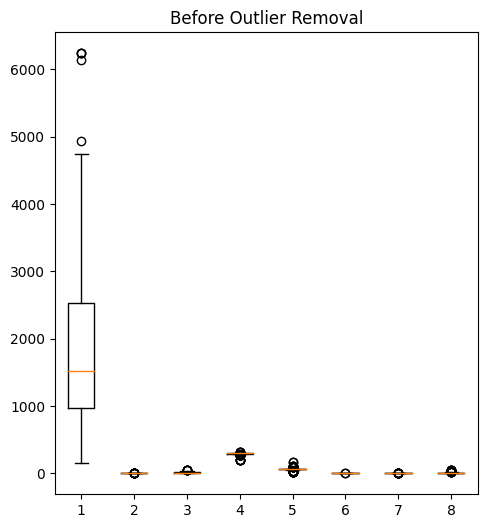

In [105]:
# Visualize the distribution of the data before outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df.values)
plt.title('Before Outlier Removal')

In [106]:
# Use IOR to remove outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [107]:
# Drop outlier
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

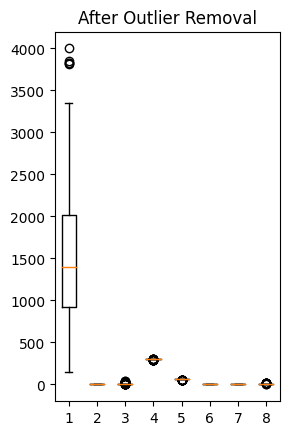

In [113]:
plt.subplot(1, 2, 2)
plt.boxplot(df.values)
plt.title('After Outlier Removal')
plt.show()

In [108]:

X = df.drop(['CO2 Uptake'], axis=1).values
y = df['CO2 Uptake'].values

In [109]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [110]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [111]:

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)



In [112]:
r2 = r2_score(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)

print("r2_score:", r2)
print("mean_absolute_error:", MAE)
print("mean_squared_error:", MSE)

r2_score: -31.59037266285101
mean_absolute_error: 27.489012953963083
mean_squared_error: 947.3660696371841
